# Computing overlaps

In [1]:
import sys
import networkx as nx
import numpy as np
import random
from collections import defaultdict
import torch
import math
import importlib
import pandas as pd
#torch.set_num_threads(1)

sys.path.insert(0, '../../')
import python_lib.graph_gen as graph_gen
import python_lib.models as models
#from python_lib import solvers



In [2]:
list(range(1, 10))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [3]:
net_specs =  ["SK_0rsb", "SK_1rsb", "SK_2rsb", "SL", "MADE_23", "MADE_32"]    
#net_specs =  ["SL", "1Par", "MADE_21", "MADE_22", "CWARNN_inf"]   
beta=1.5 
nets = {}
for net_spec in net_specs:
    nets[net_spec]={}
    print(net_spec)
    for seed in range(1, 10):
        print(seed, end=" ")
        nome_file = f"N200_seed{seed}_modelSK_net_spec{net_spec}_J1.0_h0.0_lr0.001_max_step1000_batch_size2000_std_fe_limit0.0001_beta1.50"
        nets[net_spec][seed] = torch.load(f"./data/nets/{nome_file}.pt", map_location=torch.device('cpu'))


SK_0rsb
1 2 3 4 5 6 7 8 9 SK_1rsb
1 2 3 4 5 6 7 8 9 SK_2rsb
1 2 3 4 5 6 7 8 9 SL
1 2 3 4 5 6 7 8 9 MADE_23
1 2 3 4 5 6 7 8 9 MADE_32
1 2 3 4 5 6 7 8 9 

In [4]:
for net_spec in net_specs:
    for seed in range(1, 10):
        nets[net_spec][seed].device = "cpu"
        for net_ in nets[net_spec][seed].net:
            net_.to(device="cpu")

SK_0rsb
SK_0rsb
SK_0rsb
SK_0rsb
SK_0rsb
SK_0rsb
SK_0rsb
SK_0rsb
SK_0rsb
SK_1rsb
SK_1rsb
SK_1rsb
SK_1rsb
SK_1rsb
SK_1rsb
SK_1rsb
SK_1rsb
SK_1rsb
SK_2rsb
SK_2rsb
SK_2rsb
SK_2rsb
SK_2rsb
SK_2rsb
SK_2rsb
SK_2rsb
SK_2rsb
SL
SL
SL
SL
SL
SL
SL
SL
SL
MADE_23
MADE_23
MADE_23
MADE_23
MADE_23
MADE_23
MADE_23
MADE_23
MADE_23
MADE_32
MADE_32
MADE_32
MADE_32
MADE_32
MADE_32
MADE_32
MADE_32
MADE_32


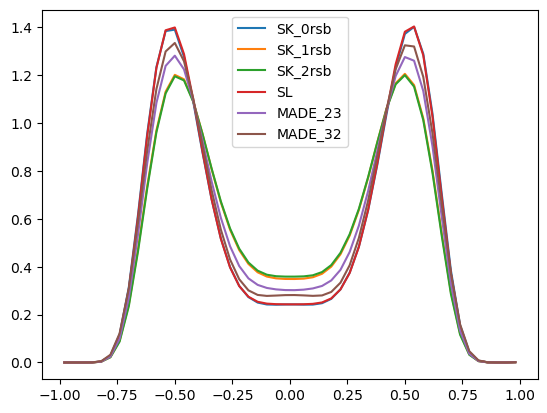

In [38]:
import matplotlib.pyplot as plt
overlaps = {}
for net_spec in net_specs:
    values = np.zeros((len(range(1, 10)), 50))
    for seed in range(1, 10):
        print(net_spec)
        x, h = nets[net_spec][seed].sample(20000)
        values[seed-1], bins = np.histogram((x@x.T).flatten().cpu().numpy()/200, bins=50, density=True, range = ([-1, 1]))
    overlaps[net_spec] = values.mean(axis=0)
    overlaps[net_spec+"_std"] = values.std(axis=0)
    overlaps["bins"] = (bins[1:] + bins[0:-1])/2
    plt.plot((bins[1:] + bins[0:-1])/2, overlaps[net_spec], label=net_spec)
plt.legend()
plt.show()

In [ ]:
overlaps["bins"] = (bins[1:] + bins[0:-1])/2
df_ov = pd.DataFrame(overlaps)
df_ov.to_csv("./data/overlaps.zip")